<br>
<img src="https://th.bing.com/th/id/R.08d78d547107a48d03c6eb2f5141f09b?rik=KNbP59PpBQwWWQ&riu=http%3a%2f%2fensai.fr%2fwp-content%2fuploads%2f2019%2f05%2fEnsai-logo-300x282.png&ehk=aRCY7kpUQ083sCCZKjkAqzG8uUQFRF8IV%2b19WNjLSwQ%3d&risl=&pid=ImgRaw&r=0&sres=1&sresct=1" width=90px align="left">
<div align="right" style="font-family: 'Arial', sans-serif; color: #333; font-size: 14px;">
    <strong>Enseignant :</strong> Christian Raymond
</div>
<div align="right" style="font-family: 'Arial', sans-serif; color: #333; font-size: 14px;">
    <strong>Réalisé par :</strong> DIAKITE Gaoussou, SADIO Ndeye Salimata et ADUAYOM MESSAN Messan Daniel 
</div>
<div align="right" style="font-family: 'Arial', sans-serif; color: #333; font-size: 14px;">
    <strong>Année :</strong> 2023/2024
</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">MASTÈRE DATA SCIENCE - CONNAISSANCE CLIENT</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Traitement Automatique des Langues
</span></div><br><br>
<hr>

<br>



<img src="https://th.bing.com/th/id/OIP.iPbwGuQCzB6z4PZNJkQJugHaJ4?rs=1&pid=ImgDetMain" width="90px" align="left">
<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>Étiquetage de Séquences pour la Détection d'Entités Nommées</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

>Dans cette partie de notre projet, nous abordons la détection des entités nommées en traitant cela comme un problème d'étiquetage de séquences. Utilisant le jeu de données CONLL 2003, nous développons un système basé sur les réseaux neuronaux pour identifier les entités dans des textes. L'approche choisie nous permet de mettre en pratique les connaissances théoriques acquises et d'appliquer les techniques d'apprentissage profond spécifiques au traitement du langage naturel.

><h2 style="color:#75DFC1; font-family: 'Arial', sans-serif;">🔍 Étapes du Projet</h2>

>1. **Chargement des Données** : Acquisition et compréhension des jeux de données CONLL 2003 pour l'entraînement, la validation et le test.
>2. **Prétraitement des Données** : Transformation des données textuelles en format adapté aux modèles d'apprentissage profond.
>3. **Développement du Modèle** : Construction et entraînement d'un modèle séquentiel basé sur LSTM pour l'étiquetage de séquences.
>4. **Évaluation et Optimisation** : Test du modèle sur un ensemble de données et ajustement des paramètres pour améliorer la performance.

><h2 style="color:#75DFC1; font-family: 'Arial', sans-serif;">🎯 Objectif du Projet</h2>

>Le but est de développer une compréhension pratique de l'application des réseaux neuronaux dans la tâche spécifique de l'étiquetage de séquences, en se concentrant sur la reconnaissance d'entités nommées pour illustrer l'efficacité de ces méthodes en traitement du langage naturel.

><h2 style="color:#75DFC1; font-family: 'Arial', sans-serif;">💡 Importance du Projet</h2>

>Ce travail met en évidence la capacité des modèles neuronaux à apprendre et à prédire la structure de données séquentielles, fournissant des insights précieux pour des applications futures en extraction d'informations et en analyse de texte.

<br/><br/><br/>


<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Installation des packages et données nécessaires</h1>

In [1]:
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-trn.txt > /dev/null 2>&1
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-val.txt > /dev/null 2>&1
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-tst.txt > /dev/null 2>&1


<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Importation des bibliothèques importantes</h1>


In [2]:
# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore', message='foo bar')

# Import des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from tensorflow.keras.layers import InputLayer, Embedding, LSTM, TimeDistributed, Dense, Activation, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping



2024-03-10 21:32:09.743406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 21:32:09.743472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 21:32:09.744423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15); margin: 0 auto;">LECTURE DES BASES DE DONNEES</h1>

<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>REPONSE - QUESTION 24 : Chargement et Exploration des Données CONLL 2003</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Dans cette section, nous abordons le chargement et l'exploration des données CONLL 2003, une étape cruciale pour comprendre la structure des données avec lesquelles nous allons travailler pour l'étiquetage de séquences. Voici une description détaillée du processus effectué par la fonction <code>load_conll_data</code> :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Lecture du Fichier :</strong> La fonction commence par ouvrir le fichier spécifié dans le chemin <code>file_path</code> et initialise une liste pour stocker les phrases.</li>
    <li><strong>Extraction des Informations :</strong> Elle lit ensuite le fichier ligne par ligne, extrayant les mots, les étiquettes de partie du discours (POS) et les étiquettes BIO. Ces éléments sont regroupés en tuples (mot, POS, BIO-tag) pour chaque token.</li>
    <li><strong>Gestion des Phrases :</strong> Les tuples sont accumulés dans une liste pour former une phrase jusqu'à ce qu'une ligne vide soit rencontrée, indiquant la fin de la phrase actuelle. La phrase est alors ajoutée à la liste des phrases, et le processus se répète pour les lignes suivantes.</li>
    <li><strong>Ignorance des Marqueurs de Document :</strong> La fonction saute les lignes commençant par "-DOCSTART-", qui servent de marqueurs de début de document et ne sont pas pertinents pour l'analyse des phrases.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    À la fin, la fonction retourne une liste de phrases, où chaque phrase est composée de tuples représentant les tokens et leurs étiquettes associées. Cette structure préparée est essentielle pour les étapes suivantes du traitement et de l'apprentissage du modèle.
</p>


In [3]:
def load_conll_data(file_path):
    """
    Cette fonction lit un fichier de données CONLL 2003 et extrait les informations pertinentes.
    
    :param file_path: Le chemin du fichier à lire.
    :return: Une liste de phrases, où chaque phrase est une liste de tuples (mot, POS, BIO-tag).
    """
    with open(file_path, 'r') as file:
        # Initialisation de la liste de phrases
        sentences = []
        sentence = []  # Initialisation d'une nouvelle phrase

        # Lecture du fichier ligne par ligne
        for line in file:
            line = line.strip()  # Suppression des espaces superflus
            if line:  # Si la ligne n'est pas vide
                if line.startswith("-DOCSTART-"):  # Ignorer les marqueurs de début de document
                    continue
                # Extraction des informations de chaque mot
                word, pos, _, bio_tag = line.split(' ')
                sentence.append((word, pos, bio_tag))
            else:  # Une ligne vide signifie la fin d'une phrase
                if sentence:  # Si la phrase actuelle contient des mots
                    sentences.append(sentence)
                    sentence = []  # Réinitialisation pour la prochaine phrase
        # Ajouter la dernière phrase si le fichier ne se termine pas par une ligne vide
        if sentence:
            sentences.append(sentence)

    return sentences

# Chargement des données d'entraînement, de validation et de test
train_data = load_conll_data('conll03-trn.txt')
val_data = load_conll_data('conll03-val.txt')
test_data = load_conll_data('conll03-tst.txt')

# Exemple : affichage de la première phrase de chaque ensemble
print("Exemple de phrase d'entraînement:", train_data[0])
print("Exemple de phrase de validation:", val_data[0])
print("Exemple de phrase de test:", test_data[0])

print()

print(f"Nombre d'exemples d'entraînement : {len(train_data)}")
print(f"Nombre d'exemples de validation : {len(val_data)}")
print(f"Nombre d'exemples de test : {len(test_data)}")



Exemple de phrase d'entraînement: [('EU', 'NNP', 'B-ORG'), ('rejects', 'VBZ', 'O'), ('German', 'JJ', 'B-MISC'), ('call', 'NN', 'O'), ('to', 'TO', 'O'), ('boycott', 'VB', 'O'), ('British', 'JJ', 'B-MISC'), ('lamb', 'NN', 'O'), ('.', '.', 'O')]
Exemple de phrase de validation: [('CRICKET', 'NNP', 'O'), ('-', ':', 'O'), ('LEICESTERSHIRE', 'NNP', 'B-ORG'), ('TAKE', 'NNP', 'O'), ('OVER', 'IN', 'O'), ('AT', 'NNP', 'O'), ('TOP', 'NNP', 'O'), ('AFTER', 'NNP', 'O'), ('INNINGS', 'NNP', 'O'), ('VICTORY', 'NN', 'O'), ('.', '.', 'O')]
Exemple de phrase de test: [('SOCCER', 'NN', 'O'), ('-', ':', 'O'), ('JAPAN', 'NNP', 'B-LOC'), ('GET', 'VB', 'O'), ('LUCKY', 'NNP', 'O'), ('WIN', 'NNP', 'O'), (',', ',', 'O'), ('CHINA', 'NNP', 'B-PER'), ('IN', 'IN', 'O'), ('SURPRISE', 'DT', 'O'), ('DEFEAT', 'NN', 'O'), ('.', '.', 'O')]

Nombre d'exemples d'entraînement : 14041
Nombre d'exemples de validation : 3250
Nombre d'exemples de test : 3453


<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Exemples de Phrases</h1>

<p>
    L'analyse des exemples de phrases issues des ensembles de données d'entraînement, de validation et de test CONLL 2003 illustre la structure détaillée utilisée pour l'étiquetage des séquences. Chaque mot dans une phrase est accompagné de sa catégorie grammaticale (Part-Of-Speech, POS) et d'une étiquette BIO qui indique son rôle dans une entité nommée :
</p>
<ul>
    <li><strong>Phrase d'entraînement :</strong> On observe la présence d'entités comme 'EU' étiquetée comme une organisation (B-ORG) et 'German' ainsi que 'British' comme entités diverses (B-MISC). Cela montre comment les mots sont classifiés et étiquetés selon leur contexte et leur fonction syntaxique.</li>
    <li><strong>Phrase de validation :</strong> Ici, 'LEICESTERSHIRE' est identifié comme une organisation (B-ORG), illustrant la variabilité et la spécificité du marquage selon les contextes.</li>
    <li><strong>Phrase de test :</strong> On note 'JAPAN' comme une localisation (B-LOC) et 'CHINA' comme une personne (B-PER), ce qui peut indiquer une erreur ou un défi particulier dans le jeu de données test, mettant en lumière l'importance de l'ajustement et de la validation du modèle.</li>
</ul>
<p>
    Ces exemples démontrent la complexité et la richesse des données CONLL 2003, soulignant les défis inhérents à la tâche d'étiquetage de séquences et la nécessité d'un modèle d'apprentissage profond efficace et bien ajusté pour interpréter correctement ces structures.
</p>


<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>REPONSE - QUESTION 24 : Extraction des Phrases et Entités</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section détaille la méthode utilisée pour extraire les phrases et leurs entités à partir des fichiers de données CONLL 2003. La fonction <code>extract_phrases_entities</code> joue un rôle crucial dans le traitement initial des données :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Lecture du Fichier :</strong> La fonction ouvre le fichier spécifié par <code>filepath</code> et prépare la structure pour accumuler les données extraites.</li>
    <li><strong>Extraction et Agglomération :</strong> Elle parcourt chaque ligne du fichier, isolant les mots et leurs étiquettes correspondantes. Ces paires mot-étiquette sont agglomérées pour former des phrases, basées sur la détection de lignes vides signifiant la fin d'une phrase.</li>
    <li><strong>Gestion des Exceptions :</strong> La fonction gère également les lignes spéciales telles que '-DOCSTART-' qui ne sont pas pertinentes pour l'extraction des phrases et sont donc omises.</li>
    <li><strong>Stockage des Résultats :</strong> Les phrases extraites avec leurs étiquettes sont stockées dans une liste, chaque phrase étant représentée comme une liste de tuples (mot, étiquette).</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    L'utilisation de cette fonction permet de structurer les données de manière appropriée pour l'entraînement, la validation, et les tests dans les étapes subséquentes du projet. Voici quelques exemples de phrases extraites, démontrant la diversité et la structure des données au sein des différents ensembles :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Données d'entraînement :</strong> Affiche des exemples de phrases avec leur étiquetage BIO, montrant comment les entités sont identifiées et classifiées.</li>
    <li><strong>Données de validation :</strong> Fournit des phrases issues de l'ensemble de validation, permettant de vérifier l'application correcte des étiquettes et la cohérence des données.</li>
    <li><strong>Données de test :</strong> Présente des phrases de l'ensemble de test, essentielles pour l'évaluation finale du modèle développé.</li>
</ul>


In [4]:
def extract_phrases_entities(filepath):
    """
    Lit un fichier d'étiquetage de séquences et extrait les phrases avec leurs étiquettes.
    
    :param filepath: Chemin vers le fichier contenant les données d'étiquetage.
    :return: Liste de phrases, chaque phrase étant une liste de tuples (mot, étiquette).
    """
    with open(filepath, 'r') as file:
        phrases_with_tags = []
        current_phrase = []
        
        for line in file:
            # Gère les fins de phrases ou lignes non pertinentes
            if not line.strip() or line.startswith('-DOCSTART') or line == "\n":
                if current_phrase:
                    phrases_with_tags.append(current_phrase)
                    current_phrase = []
                continue
            
            # Extrait le mot et son étiquette et les ajoute à la phrase courante
            parts = line.split(' ')
            word = parts[0]
            tag = parts[-1].strip()  # Enlève les caractères de fin de ligne
            current_phrase.append((word, tag))
        
        # N'oublie pas d'ajouter la dernière phrase si le fichier ne finit pas par une ligne vide
        if current_phrase:
            phrases_with_tags.append(current_phrase)
    
    return phrases_with_tags

# Utilisation de la fonction pour charger les jeux de données
training_data = extract_phrases_entities("conll03-trn.txt")
validation_data = extract_phrases_entities("conll03-val.txt")
test_data = extract_phrases_entities("conll03-tst.txt")

# Affichage de quelques exemples de phrases extraites des jeux de données

# Exemples du jeu de données d'entraînement
print("Quelques phrases extraites des données d'entraînement :")
for i, phrase in enumerate(training_data[:3]):
    print(f"Phrase {i + 1}: {phrase}")

# Exemples du jeu de données de validation
print("\nQuelques phrases extraites des données de validation :")
for i, phrase in enumerate(validation_data[:3]):
    print(f"Phrase {i + 1}: {phrase}")

# Exemples du jeu de données de test
print("\nQuelques phrases extraites des données de test :")
for i, phrase in enumerate(test_data[:3]):
    print(f"Phrase {i + 1}: {phrase}")
    


Quelques phrases extraites des données d'entraînement :
Phrase 1: [('EU', 'B-ORG'), ('rejects', 'O'), ('German', 'B-MISC'), ('call', 'O'), ('to', 'O'), ('boycott', 'O'), ('British', 'B-MISC'), ('lamb', 'O'), ('.', 'O')]
Phrase 2: [('Peter', 'B-PER'), ('Blackburn', 'I-PER')]
Phrase 3: [('BRUSSELS', 'B-LOC'), ('1996-08-22', 'O')]

Quelques phrases extraites des données de validation :
Phrase 1: [('CRICKET', 'O'), ('-', 'O'), ('LEICESTERSHIRE', 'B-ORG'), ('TAKE', 'O'), ('OVER', 'O'), ('AT', 'O'), ('TOP', 'O'), ('AFTER', 'O'), ('INNINGS', 'O'), ('VICTORY', 'O'), ('.', 'O')]
Phrase 2: [('LONDON', 'B-LOC'), ('1996-08-30', 'O')]
Phrase 3: [('West', 'B-MISC'), ('Indian', 'I-MISC'), ('all-rounder', 'O'), ('Phil', 'B-PER'), ('Simmons', 'I-PER'), ('took', 'O'), ('four', 'O'), ('for', 'O'), ('38', 'O'), ('on', 'O'), ('Friday', 'O'), ('as', 'O'), ('Leicestershire', 'B-ORG'), ('beat', 'O'), ('Somerset', 'B-ORG'), ('by', 'O'), ('an', 'O'), ('innings', 'O'), ('and', 'O'), ('39', 'O'), ('runs', 'O'), (

<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Exemples de Phrases</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Les exemples de phrases tirés des ensembles d'entraînement, de validation et de test fournissent un aperçu tangible de la manière dont les données sont structurées et étiquetées dans le cadre de la tâche d'étiquetage de séquences pour la reconnaissance d'entités nommées :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Phrases d'entraînement :</strong> Ces phrases illustrent l'application des étiquettes BIO, montrant des entités comme 'EU' classée comme organisation et 'German' ou 'British' comme diverses. Cela démontre le processus d'identification et de classification des entités dans un contexte spécifique.</li>
    <li><strong>Phrases de validation :</strong> Des exemples tels que 'LEICESTERSHIRE' identifié comme une organisation valident la cohérence de l'application des étiquettes à travers les différents ensembles de données et montrent l'utilité du set de validation pour ajuster et évaluer la précision du modèle.</li>
    <li><strong>Phrases de test :</strong> La mention de 'JAPAN' comme localisation et 'CHINA' comme personne dans le set de test met en évidence les défis de l'étiquetage correct, particulièrement lorsque des noms peuvent appartenir à des catégories différentes selon le contexte.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    L'extraction et l'analyse de ces exemples démontrent l'importance d'une compréhension approfondie de la structure des données et des nuances de l'étiquetage BIO pour le développement d'un modèle efficace de reconnaissance d'entités nommées.
</p>



<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15); margin: 0 auto;">PREPARATION DE LA BASE DE DONNEES </h1>


<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>REPONSE - QUESTION 25 : Préparation des Données pour le Modèle Séquentiel</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section du notebook aborde l'étape cruciale de transformation des données pour les adapter à l'utilisation avec un modèle séquentiel de type réseau récurrent dans TensorFlow Keras. Ce processus inclut plusieurs sous-étapes clés pour structurer et préparer les données :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Création des Ensembles Uniques :</strong> Identification et stockage de tous les mots et étiquettes uniques à partir des données d'entraînement, de validation et de test pour former le vocabulaire et les catégories d'étiquettes.</li>
    <li><strong>Mapping des Étiquettes et des Mots :</strong> Attribution d'un indice unique à chaque étiquette et chaque mot, créant ainsi une représentation numérique qui sera utilisée pour l'encodage.</li>
    <li><strong>Encodage des Données :</strong> Conversion des mots et des étiquettes en leurs indices correspondants, préparant les données pour l'entraînement du modèle en format adéquat.</li>
    <li><strong>Uniformisation des Longueurs de Séquences :</strong> Application de padding pour assurer que toutes les séquences de mots et d'étiquettes ont la même longueur, un prérequis pour le traitement par des modèles de réseaux de neurones récurrents.</li>
    <li><strong>Préparation des Batches :</strong> Organisation des données en lots, permettant une gestion plus efficace lors de l'entraînement du modèle.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    L'ensemble de ces étapes constitue une préparation minutieuse des données, essentielle pour assurer l'efficacité et la précision du modèle séquentiel qui suivra. Cette préparation implique non seulement l'encodage et le padding mais également la structuration des données de manière à optimiser leur utilisation lors de l'apprentissage profond.
</p>


<h1 style="background-color: #A5D6A7; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Création des ensembles uniques pour vocabulaire et étiquettes</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette partie du code se concentre sur la création de deux ensembles uniques : l'un pour le vocabulaire et l'autre pour les étiquettes. Ces ensembles sont essentiels pour la transformation des données textuelles en une forme numérique que le modèle de réseau de neurones peut traiter.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Collecte de Mots et Étiquettes Uniques :</strong> Ce processus parcourt les jeux de données d'entraînement, de validation et de test pour extraire chaque mot et étiquette. Chaque mot est converti en minuscule pour garantir l'unicité et est ajouté à l'ensemble des mots uniques. De même, chaque étiquette est ajoutée à l'ensemble des étiquettes uniques.</li>
    <li><strong>Importance des Ensembles Uniques :</strong> Avoir un inventaire complet du vocabulaire et des étiquettes est crucial pour l'encodage subséquent des données. Le vocabulaire servira à convertir les mots en indices, tandis que les étiquettes uniques permettront de créer des représentations vectorielles pour l'entraînement du modèle.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    À l'issue de cette étape, nous disposons de deux ensembles clairs et exhaustifs qui fourniront la base pour les transformations nécessaires à l'apprentissage et à l'évaluation du modèle séquentiel de type réseau récurrent.
</p>


In [5]:
# Définir des ensembles pour capturer le vocabulaire et les étiquettes uniques
unique_labels = set()
unique_words = set()

# Parcourir les données d'entraînement, de validation et de test pour remplir les ensembles
for dataset in [training_data, validation_data, test_data]:
    for sentence in dataset:
        for word, label in sentence:
            # Ajouter l'étiquette à l'ensemble des étiquettes uniques
            unique_labels.add(label)
            # Ajouter le mot converti en minuscule à l'ensemble des mots uniques
            unique_words.add(word.lower())

# À ce stade, `unique_labels` contient toutes les étiquettes uniques et `unique_words` tous les mots uniques.
print(f"Les Labels uniques {unique_labels}")

Les Labels uniques {'B-LOC', 'I-ORG', 'O', 'I-MISC', 'I-PER', 'B-ORG', 'B-PER', 'I-LOC', 'B-MISC'}


<h1 style="background-color: #A5D6A7; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Structuration et Indexation des Étiquettes et Mots</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Dans cette section, nous organisons les étiquettes de manière ordonnée et attribuons un indice numérique à chaque mot et étiquette, ce qui est crucial pour la représentation numérique des données textuelles et leur traitement par le modèle.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Trie des Étiquettes :</strong> Les étiquettes uniques sont triées pour garantir une consistance dans leur indexation. Cela permet de s'assurer que l'ordre des indices est prévisible et cohérent à travers les différentes utilisations.</li>
    <li><strong>Création de Mappings :</strong> Des mappings sont créés pour associer chaque étiquette à un indice unique et vice-versa. Ces mappings sont essentiels pour convertir les étiquettes textuelles en étiquettes numériques que le modèle peut comprendre.</li>
    <li><strong>Initialisation du Dictionnaire des Mots :</strong> Un dictionnaire pour les mots est initialisé, incluant des tokens spéciaux pour le padding et les mots inconnus, afin de gérer les mots hors vocabulaire ou les séquences de longueurs variables.</li>
    <li><strong>Indexation des Mots :</strong> Chaque mot unique est ensuite associé à un indice dans le dictionnaire, permettant la conversion des séquences de mots en séquences d'indices pour l'entraînement et les prédictions.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Ces préparations garantissent que les données peuvent être efficacement traitées et interprétées par le modèle de réseau de neurones, facilitant l'apprentissage à partir de structures textuelles complexes.
</p>


In [6]:
# Ordonner les étiquettes de façon unique et prévisible
unique_labels_sorted = sorted(list(unique_labels), key=len)

# Mapping des étiquettes à des indices
labels_to_index = {}
for label in unique_labels_sorted:
    labels_to_index[label] = len(labels_to_index)

# Mapping inverse : indices à étiquettes
index_to_labels = {index: label for label, index in labels_to_index.items()}

# Initialisation du dictionnaire des mots avec des tokens spéciaux
tokens_dictionary = {"PADDING_TOKEN": 0, "UNKNOWN_TOKEN": 1}

# Attribuer un indice à chaque mot unique
for word in unique_words:
    if word not in tokens_dictionary:
        tokens_dictionary[word] = len(tokens_dictionary)

# Maintenant, `tokens_dictionary` contient un index pour chaque mot unique plus les tokens spéciaux.


<h1 style="background-color: #A5D6A7; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Encodage des Données en Indices</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette partie du code implémente la fonction <code>index_encoding</code>, qui est essentielle pour transformer les données textuelles en un format numérique adapté à l'apprentissage par un modèle de réseau de neurones.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Conversion des mots et étiquettes en indices :</strong> La fonction parcourt chaque phrase et convertit chaque mot et étiquette en leur indice correspondant, en utilisant les dictionnaires préparés auparavant.</li>
    <li><strong>Création de séquences encodées :</strong> Pour chaque phrase, la fonction crée une liste d'indices de mots et une liste d'indices d'étiquettes, formant ainsi des séquences numériques qui reflètent la structure originale des données textuelles.</li>
    <li><strong>Utilisation de tokens spéciaux :</strong> La fonction utilise un indice spécifique pour les mots inconnus (UNKNOWN_TOKEN) afin de gérer les mots qui ne sont pas présents dans le dictionnaire, assurant ainsi une certaine robustesse du modèle face à des mots inédits.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    À l'issue de cette étape, les données sont entièrement converties en format numérique, prêtes pour l'entraînement ou l'évaluation du modèle. Ces séquences encodées fournissent les entrées nécessaires pour les architectures de réseaux de neurones qui seront utilisées dans les phases suivantes du projet.
</p>


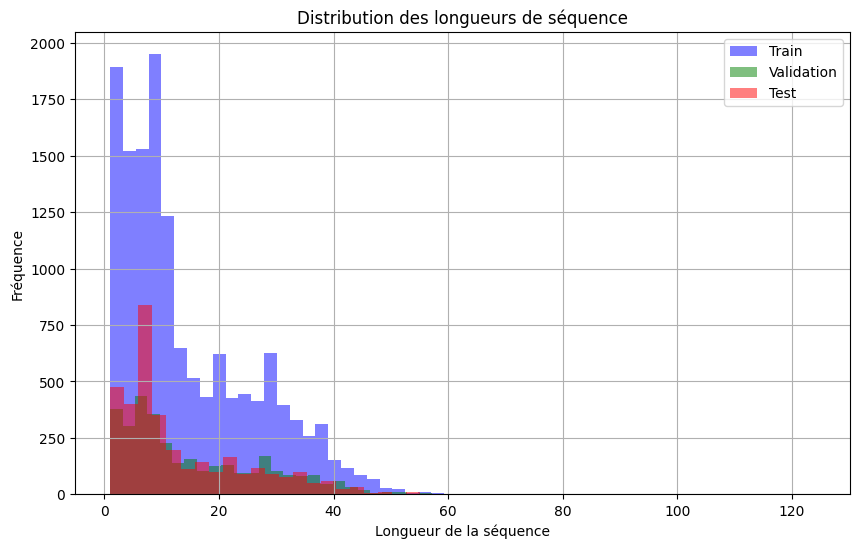

In [7]:
def index_encoding(data, words_index, labels_index):
    """
    Convertit les mots et les étiquettes en indices numériques basés sur les dictionnaires fournis.
    
    Args:
    data (list): Données d'entrée avec des phrases représentées par des listes de tuples (mot, étiquette).
    words_index (dict): Dictionnaire pour la conversion des mots en indices.
    labels_index (dict): Dictionnaire pour la conversion des étiquettes en indices.
    
    Returns:
    Tuple: Deux listes contenant les indices de mots et d'étiquettes pour chaque phrase.
    """
    encoded_sentences = []  # Indices de mots pour chaque phrase
    encoded_labels = []  # Indices d'étiquettes pour chaque phrase
    
    for sentence in data:
        word_indices = []  # Indices de mots pour une phrase spécifique
        label_indices = []  # Indices d'étiquettes pour une phrase spécifique
        
        for word, label in sentence:
            word_index = words_index.get(word.lower(), words_index['UNKNOWN_TOKEN'])
            word_indices.append(word_index)
            label_index = labels_index[label]
            label_indices.append(label_index)
        
        encoded_sentences.append(word_indices)
        encoded_labels.append(label_indices)
    
    return encoded_sentences, encoded_labels

# Application de la fonction pour encoder les données
encoded_train_sentences, encoded_train_labels = index_encoding(training_data, tokens_dictionary, labels_to_index)
encoded_valid_sentences, encoded_valid_labels = index_encoding(validation_data, tokens_dictionary, labels_to_index)
encoded_test_sentences, encoded_test_labels = index_encoding(test_data, tokens_dictionary, labels_to_index)

# Calculer les longueurs de séquence
train_sequence_lengths = [len(seq) for seq in encoded_train_sentences]
valid_sequence_lengths = [len(seq) for seq in encoded_valid_sentences]
test_sequence_lengths = [len(seq) for seq in encoded_test_sentences]

# Tracer l'histogramme des longueurs de séquence
plt.figure(figsize=(10, 6))
plt.hist(train_sequence_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(valid_sequence_lengths, bins=50, alpha=0.5, color='green', label='Validation')
plt.hist(test_sequence_lengths, bins=50, alpha=0.5, color='red', label='Test')
plt.title('Distribution des longueurs de séquence')
plt.xlabel('Longueur de la séquence')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()



<h1 style="background-color: #A5D6A7; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Normalisation des Longueurs de Séquences par Padding</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette partie du processus implique la fonction <code>uniform_padding</code>, qui assure que toutes les séquences de mots et d'étiquettes ont une longueur uniforme en appliquant du padding.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Application du Padding :</strong> Le padding est appliqué pour uniformiser la longueur de toutes les séquences à une longueur spécifiée, essentielle pour le traitement par des modèles de réseaux de neurones qui nécessitent une dimension d'entrée constante.</li>
    <li><strong>Choix du Type de Padding :</strong> La fonction permet de choisir entre le padding à la fin ('post') ou au début ('pre') des séquences, adaptant ainsi le processus aux exigences spécifiques du modèle ou de la tâche.</li>
    <li><strong>Transformation des Données :</strong> Les séquences de mots et d'étiquettes sont converties en tableaux numpy, facilitant leur manipulation et leur utilisation lors de l'entraînement ou de l'évaluation du modèle.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    En résultat, cette étape standardise les longueurs des séquences, rendant les données prêtes pour une intégration efficace dans le processus d'apprentissage du modèle séquentiel.
</p>


In [8]:
def uniform_padding(sequences, target_sequences, sequence_length, pad_type='post'):
    """
    Uniformise la longueur des séquences de mots et d'étiquettes.

    Args:
    sequences (list): Séquences de mots représentées par des indices.
    target_sequences (list): Séquences d'étiquettes représentées par des indices.
    sequence_length (int): Longueur uniforme à atteindre pour chaque séquence.
    pad_type (str): Détermine où le padding doit être appliqué ('post' ou 'pre').

    Returns:
    Tuple: Deux tableaux numpy représentant les séquences de mots et d'étiquettes paddées.
    """
    # Padding des séquences de mots
    padded_sequences = pad_sequences(sequences, maxlen=sequence_length, padding=pad_type)
    
    # Padding des séquences d'étiquettes
    padded_target_sequences = pad_sequences(target_sequences, maxlen=sequence_length, padding=pad_type)
    
    return padded_sequences, padded_target_sequences

# Définir la longueur maximale des séquences
max_sequence_length = 128

# Appliquer le padding aux ensembles d'entraînement, de validation et de test
encoded_train_features, encoded_train_targets = uniform_padding(encoded_train_sentences, encoded_train_labels, max_sequence_length, 'post')
encoded_valid_features, encoded_valid_targets = uniform_padding(encoded_valid_sentences, encoded_valid_labels, max_sequence_length, 'post')
encoded_test_features, encoded_test_targets = uniform_padding(encoded_test_sentences, encoded_test_labels, max_sequence_length, 'post')

# Imprimer quelques exemples du résultat du padding pour l'ensemble d'entraînement
print("Exemples du résultat du padding pour l'ensemble d'entraînement :")
for i in range(2):
    print(f"Séquence {i + 1}:")
    print("Séquence de mots paddée :", encoded_train_features[i])
    print("Séquence d'étiquettes paddée :", encoded_train_targets[i])
    print("Indices des étiquettes :", [index_to_labels[idx] for idx in encoded_train_targets[i]])
    print()
print()
print(labels_to_index)

Exemples du résultat du padding pour l'ensemble d'entraînement :
Séquence 1:
Séquence de mots paddée : [ 1265 21330 24711 23006  8575 21888  3188 21783 11401     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
Séquence d'étiquettes paddée : [4 0 8 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 

<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Remarque sur l'Encodage des Données</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Dans le cadre de la préparation des données pour un modèle séquentiel de type réseau récurrent, nous avons suivi une approche différente de l'encodage des étiquettes. Contrairement à l'encodage one-hot, nous avons attribué un chiffre unique à chaque étiquette au lieu de créer des vecteurs one-hot. Cette décision a été prise suite à des performances insatisfaisantes des modèles utilisant l'encodage one-hot, où les modèles semblaient avoir du mal à apprendre les relations entre les données et les étiquettes.
    L'encodage numérique des étiquettes a été réalisé en attribuant un mapping spécifique à chaque étiquette. Cette approche, bien que différente de l'encodage one-hot, a conduit à des résultats plus satisfaisants, permettant aux modèles de mieux appréhender les informations contenues dans les données et d'améliorer leurs performances.
    Il est à noter que cette décision a été influencée par des recherches sur internet et la lecture d'articles pertinents qui ont mis en avant l'efficacité de cette approche dans des contextes similaires. Les résultats obtenus avec cette méthode ont confirmé sa pertinence pour notre cas d'étude.
</p>


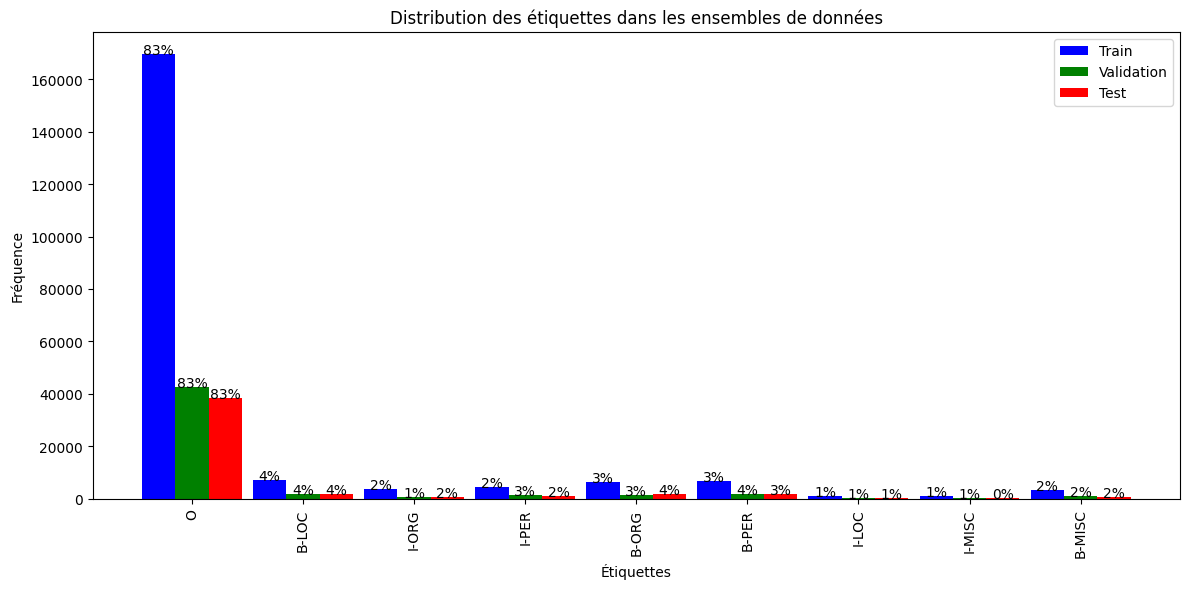

In [9]:
# Fonction pour compter les occurrences des étiquettes dans une liste de séquences d'étiquettes
def count_label_occurrences(label_sequences):
    label_counts = {}
    for sequence in label_sequences:
        for label in sequence:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
    return label_counts

# Compter les occurrences des étiquettes dans les ensembles d'entraînement, de validation et de test
train_label_counts = count_label_occurrences(encoded_train_labels)
valid_label_counts = count_label_occurrences(encoded_valid_labels)
test_label_counts = count_label_occurrences(encoded_test_labels)

# Créer une liste de toutes les étiquettes uniques
all_labels = set(train_label_counts.keys()).union(set(valid_label_counts.keys()), set(test_label_counts.keys()))

# Initialiser les compteurs pour chaque étiquette
train_label_freq = [train_label_counts.get(label, 0) for label in all_labels]
valid_label_freq = [valid_label_counts.get(label, 0) for label in all_labels]
test_label_freq = [test_label_counts.get(label, 0) for label in all_labels]

# Créer une liste des libellés dans le même ordre que les indices
label_names = [index_to_labels[index] for index in all_labels]

# Calculer les pourcentages de chaque label dans les ensembles de données
train_label_percentages = train_label_freq / np.sum(train_label_freq) * 100
valid_label_percentages = valid_label_freq / np.sum(valid_label_freq) * 100
test_label_percentages = test_label_freq / np.sum(test_label_freq) * 100

# Convertir le dictionnaire labels_to_index en une liste ordonnée d'étiquettes
label_names = sorted(labels_to_index, key=labels_to_index.get)

# Tracer le diagramme en barres avec les pourcentages arrondis
plt.figure(figsize=(12, 6))
bar_width = 0.3
label_indices = np.arange(len(label_names))
plt.bar(label_indices - bar_width, train_label_freq, bar_width, color='blue', label='Train')
plt.bar(label_indices, valid_label_freq, bar_width, color='green', label='Validation')
plt.bar(label_indices + bar_width, test_label_freq, bar_width, color='red', label='Test')
plt.xlabel('Étiquettes')
plt.ylabel('Fréquence')
plt.title('Distribution des étiquettes dans les ensembles de données')
plt.xticks(label_indices, label_names, rotation=90)
plt.legend()

# Afficher les pourcentages arrondis au-dessus des barres
for i, label_index in enumerate(label_indices):
    plt.text(label_index - bar_width, train_label_freq[i] + 10, f'{train_label_percentages[i]:.0f}%', ha='center', color='black')
    plt.text(label_index, valid_label_freq[i] + 10, f'{valid_label_percentages[i]:.0f}%', ha='center', color='black')
    plt.text(label_index + bar_width, test_label_freq[i] + 10, f'{test_label_percentages[i]:.0f}%', ha='center', color='black')

plt.tight_layout()
plt.show()




<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Remarque sur le Déséquilibre des Classes</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Il est important de noter que les classes des étiquettes présentent un déséquilibre significatif dans les données. Par exemple, la classe 'O' est la plus représentée dans toutes les bases de données, tandis que d'autres classes peuvent être sous-représentées. Ce déséquilibre peut avoir un impact sur la capacité du modèle à généraliser correctement sur les classes moins représentées, car il peut conduire à un biais dans les prédictions. Ainsi, lors de l'évaluation des performances du modèle et du choix de stratégies pour y remédier, il est crucial de prendre en compte ce déséquilibre pour garantir une classification précise et équilibrée.
</p>


<h1 style="background-color:#A5D6A7; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Préparation des Données pour l'Entraînement, la Validation et le Test</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette étape du processus se concentre sur la structuration des données en lots adaptés pour l'entraînement, la validation et les tests, utilisant TensorFlow pour créer des datasets optimisés.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Définition des Tailles de Lots :</strong> La taille des lots est définie pour chaque type de dataset, permettant un traitement efficace et parallélisé des données lors de l'apprentissage et de l'évaluation du modèle.</li>
    <li><strong>Création de tf.data.Dataset :</strong> Les données encodées et paddées sont organisées en structures tf.data.Dataset, facilitant leur manipulation et leur intégration dans les étapes de formation et d'évaluation du modèle.</li>
    <li><strong>Mélange des Données d'Entraînement :</strong> L'ensemble d'entraînement est mélangé pour introduire de la variabilité et réduire le risque de surapprentissage, améliorant ainsi la généralisation du modèle.</li>
    <li><strong>Mise en Lots :</strong> Les datasets sont divisés en lots, permettant au modèle de traiter les données par groupes de taille fixe, optimisant l'usage des ressources et améliorant la stabilité de l'apprentissage.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Ces préparatifs sont cruciaux pour l'efficacité de l'entraînement et la fiabilité des phases de validation et de test, garantissant que le modèle peut apprendre de manière structurée et évaluer précisément les performances.
</p>


In [10]:
# Définition des tailles de lots
batch_size_training = 32
batch_size_validation = 64
batch_size_testing = 64

# Création de tf.data.Dataset pour chaque ensemble
dataset_train = tf.data.Dataset.from_tensor_slices((encoded_train_features, encoded_train_targets))
dataset_valid = tf.data.Dataset.from_tensor_slices((encoded_valid_features, encoded_valid_targets))
dataset_test = tf.data.Dataset.from_tensor_slices((encoded_test_features, encoded_test_targets))

# Mélange de l'ensemble d'entraînement
dataset_train_shuffled = dataset_train.shuffle(buffer_size=encoded_train_features.shape[0], reshuffle_each_iteration=True)

# Mise en lots des ensembles de données
dataset_train_batched = dataset_train_shuffled.batch(batch_size_training, drop_remainder=True)
dataset_valid_batched = dataset_valid.batch(batch_size_validation, drop_remainder=True)
dataset_test_batched = dataset_test.batch(batch_size_testing, drop_remainder=True)


<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15); margin: 0 auto;">Modèles : LSTM</h1>


<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>REPONSE - QUESTION 26 : Création et Entraînement du Modèle NER</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section se consacre à la définition et à l'entraînement d'un modèle de reconnaissance d'entités nommées (NER) utilisant TensorFlow Keras. Le processus englobe la construction du modèle et son ajustement basé sur les données préparées.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Construction du Modèle :</strong> Le modèle, nommé ner1, est un réseau séquentiel composé d'une couche d'entrée, d'une couche d'embedding, suivie d'une couche LSTM et d'une couche dense, terminant par une activation softmax pour la classification des étiquettes.</li>
    <li><strong>Paramètres Clés :</strong> La longueur maximale de séquence, la dimension des embeddings, et la dimension du LSTM sont définies pour structurer le réseau. Le modèle est ensuite compilé avec un optimiseur et une fonction de perte adaptés aux tâches de classification séquentielle.</li>
    <li><strong>Entraînement du Modèle :</strong> Le ner1 est entraîné en utilisant les données d'entraînement et de validation batchées, permettant d'ajuster les poids du réseau pour optimiser la performance de reconnaissance des entités nommées.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette étape vise à calibrer le modèle sur les données spécifiques au projet, affinant sa capacité à identifier et classifier correctement les entités au sein des phrases fournies.
</p>


In [11]:
# Définition des dimensions clés
maxlen = 128  # Définie lors du padding
embed_dim = 100  # Dimension de l'espace des embeddings
lstm_dim = 64  # Dimension de sortie des unités LSTM
ntokens = len(tokens_dictionary)  # Nombre total de mots uniques + tokens spéciaux
ntags = len(labels_to_index)  # Nombre total d'étiquettes uniques

# Création du modèle
ner1 = tf.keras.Sequential()
ner1.add(tf.keras.layers.InputLayer(input_shape=(maxlen,)))  # Longueur maximale des séquences
ner1.add(tf.keras.layers.Embedding(input_dim=ntokens, output_dim=embed_dim, mask_zero=True))  # Couche d'embedding
ner1.add(tf.keras.layers.LSTM(lstm_dim, return_sequences=True))  # LSTM avec sortie à chaque timestep
ner1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(ntags, activation=None)))  # Dense appliquée à chaque timestep
ner1.add(tf.keras.layers.Activation('softmax'))  # Softmax pour obtenir les probabilités

# Compilation du modèle
ner1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = ner1.fit(dataset_train_batched, epochs=5, validation_data=dataset_valid_batched)


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9547 - loss: 0.9087 - val_accuracy: 0.9276 - val_loss: 0.4260
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.9507 - loss: 0.2929 - val_accuracy: 0.9128 - val_loss: 0.2744
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.9581 - loss: 0.1447 - val_accuracy: 0.9090 - val_loss: 0.2128
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 33s 76ms/step - accuracy: 0.9580 - loss: 0.0807 - val_accuracy: 0.9156 - val_loss: 0.1989
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.9536 - loss: 0.0548 - val_accuracy: 0.9096 - val_loss: 0.1962


<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Résultats de l'Entraînement</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Les résultats obtenus après les cinq epochs d'entraînement du modèle ner1 fournissent des informations précieuses sur la performance et l'efficacité de ce dernier en matière de reconnaissance des entités nommées :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Amélioration Progressive :</strong> Au fil des epochs, nous observons une évolution de l'accuracy et de la réduction de la loss, indiquant une amélioration de la capacité du modèle à reconnaître les entités correctement.</li>
    <li><strong>Validation du Modèle :</strong> La validation parallèle au processus d'entraînement permet d'évaluer l'efficacité du modèle sur des données non vues, montrant ainsi sa capacité de généralisation.</li>
    <li><strong>Interprétation des Résultats :</strong> Bien que l'accuracy montre une progression, la présence d'une valeur de loss encore significative indique des axes potentiels d'amélioration, notamment en termes de complexité du modèle ou de finesse des données d'entraînement.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Ces observations mettent en lumière la nécessité d'itérations supplémentaires pour ajuster et affiner le modèle, potentiellement en modifiant la structure du réseau, en affinant les paramètres ou en enrichissant les données d'entraînement, afin d'améliorer la précision et l'efficacité de la reconnaissance des entités.
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Un travail futur sur le modèle ner1 pourrait inclure des ajustements basés sur une analyse plus approfondie des résultats obtenus, des tests avec différentes architectures ou paramètres, et une exploration de méthodes d'augmentation ou d'enrichissement des données pour renforcer les capacités d'apprentissage et de généralisation du modèle.
</p>


<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>REPONSE - QUESTION 27 : Décodage des Étiquettes sur l'Ensemble de Test</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section décrit le processus utilisé pour déduire les étiquettes prédites pour chaque séquence de l'ensemble de test à l'aide du modèle NER entraîné.
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Prédiction des Étiquettes :</strong> Le modèle entraîné est utilisé pour prédire les étiquettes de l'ensemble de test. Les prédictions sont obtenues sous forme de probabilités pour chaque étiquette possible à chaque position de la séquence.</li>
    <li><strong>Extraction des Indices d'Étiquettes :</strong> Pour chaque position dans chaque séquence, l'indice de l'étiquette avec la probabilité la plus élevée est sélectionné, ce qui permet de convertir les probabilités en étiquettes spécifiques.</li>
    <li><strong>Conversion en Étiquettes Textuelles :</strong> Les indices d'étiquettes prédits sont ensuite convertis en étiquettes textuelles à l'aide du mapping préalablement établi, générant ainsi une séquence d'étiquettes textuelles pour chaque séquence de l'ensemble de test.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    À l'issue de cette étape, nous disposons des étiquettes textuelles prédites pour chaque token dans chaque phrase testée, permettant l'évaluation de la performance du modèle et l'analyse qualitative de ses prédictions.
</p>


In [12]:
# Prédiction des étiquettes sur l'ensemble de test
predictions = ner1.predict(dataset_test_batched)

# La sortie est sous forme [batch_size, sequence_length, num_labels]
# On extrait l'indice de la valeur maximale dans la dernière dimension pour obtenir l'indice de l'étiquette prédite
predicted_label_indices = np.argmax(predictions, axis=-1)  # [batch_size, sequence_length]

# Conversion des indices d'étiquettes en étiquettes textuelles
predicted_labels = []
for sequence in predicted_label_indices:
    predicted_labels_sequence = [index_to_labels[index] for index in sequence]
    predicted_labels.append(predicted_labels_sequence)

# À ce stade, `predicted_labels` contient les étiquettes textuelles prédites pour chaque token dans chaque séquence de l'ensemble de test.


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step


<hr style="border-width:6px;border-color:#75DFC1">
<center><h1>RÉPONSE - QUESTION 28 : Limitations de la Fonction Evaluate pour le NER</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section aborde les raisons pour lesquelles la fonction <code>evaluate</code> de TensorFlow Keras n'est pas directement utilisable pour évaluer précisément un modèle de reconnaissance d'entités nommées (NER).
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Indépendance des Séquences :</strong> NER dépend du contexte des séquences, mais la fonction <code>evaluate</code> traite chaque échantillon indépendamment, ignorant les relations entre les tokens adjacents.</li>
    <li><strong>Évaluation au Niveau du Token :</strong> La fonction évalue la performance au niveau du token, tandis que pour le NER, une évaluation au niveau de l'entité est cruciale pour apprécier la qualité des prédictions.</li>
    <li><strong>Impact du Padding :</strong> Les tokens de padding peuvent fausser les résultats d'évaluation, car la fonction <code>evaluate</code> ne les exclut pas automatiquement du calcul des métriques.</li>
    <li><strong>Métriques Spécifiques :</strong> Le NER nécessite des métriques telles que le score F1 par type d'entité, que <code>evaluate</code> ne calcule pas directement, nécessitant ainsi des calculs personnalisés.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Pour ces raisons, il est recommandé d'utiliser la fonction <code>predict</code> pour obtenir les prédictions et de les post-traiter avec un algorithme spécifique au NER pour calculer les métriques pertinentes, offrant une évaluation plus représentative de la performance du modèle.
</p>


<br/>
<hr style="border-width:6px;border-color:#75DFC1">
<center><h1> REPONSE - QUESTION  29 :  -  Calcul des métriques de rappel et de précision pour les étiquettes</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section du notebook présente le calcul des métriques de rappel et de précision pour les étiquettes B-* et I-* (* ∈ {LOC, PER, ORG, MISC}) dans le cadre de la tâche de reconnaissance d'entités nommées (NER). Le processus comprend :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Collecte des Étiquettes :</strong> Les vraies étiquettes et les étiquettes prédites sont collectées en utilisant le modèle entraîné. Les prédictions sont effectuées sur l'ensemble de test à l'aide de la fonction `predict`.</li>
    <li><strong>Aplatir les Étiquettes :</strong> Les étiquettes sont aplaties pour faciliter le calcul des métriques de classification. Une fonction `flatten_labels` est utilisée à cette fin.</li>
    <li><strong>Conversion des Indices en Étiquettes Textuelles :</strong> Les indices prédits sont convertis en étiquettes textuelles à l'aide du dictionnaire `index_to_labels`.</li>
    <li><strong>Calcul et Affichage des Métriques :</strong> Les métriques de rappel et de précision sont calculées pour chaque étiquette B-* et I-*. Les résultats sont ensuite affichés à l'aide de la fonction `classification_report`.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette analyse permet d'évaluer la performance du modèle NER sur des étiquettes spécifiques, ce qui est essentiel pour comprendre ses forces et ses faiblesses dans la reconnaissance d'entités nommées.
</p>


In [13]:
def flatten_labels(labels_batched):
    """
    Aplatit les étiquettes contenues dans les batchs.

    Args:
    labels_batched (list of np.ndarray): Liste contenant les batchs d'étiquettes.

    Returns:
    list: Liste des étiquettes aplaties.
    """
    return [label for batch in labels_batched for label in batch.flatten()]

# Collecter les vraies étiquettes et les étiquettes prédites en utilisant le modèle
true_labels = []
pred_labels = []

for sentences_batch, labels_batch in dataset_test_batched:
    predictions = ner1(sentences_batch)
    predicted_classes = tf.argmax(tf.nn.softmax(predictions), axis=2)
    
    true_labels.extend(labels_batch.numpy())
    pred_labels.extend(predicted_classes.numpy())

# Aplatir les listes d'étiquettes
true_labels_flat = flatten_labels(true_labels)
pred_labels_flat = flatten_labels(pred_labels)

# Convertir les indices en étiquettes textuelles
true_labels_text = [index_to_labels[label] for label in true_labels_flat]
predicted_labels_text = [index_to_labels[label] for label in pred_labels_flat]

# Calculer et afficher le rapport de classification
report = classification_report(true_labels_text, predicted_labels_text, labels=[label for label in index_to_labels.values()], digits=4, zero_division=0)
print(report)


              precision    recall  f1-score   support

           O     0.9964    0.8667    0.9270    426208
       B-LOC     0.1858    0.8044    0.3019      1651
       I-ORG     0.0223    0.6025    0.0431       815
       I-PER     0.1547    0.7332    0.2555      1147
       B-ORG     0.1493    0.6528    0.2430      1610
       B-PER     0.2400    0.6297    0.3475      1596
       I-LOC     0.0122    0.7098    0.0239       255
      I-MISC     0.0810    0.5755    0.1420       212
      B-MISC     0.3237    0.6070    0.4222       682

    accuracy                         0.8633    434176
   macro avg     0.2406    0.6868    0.3007    434176
weighted avg     0.9813    0.8633    0.9148    434176



In [14]:
# Fonction pour aplatir les étiquettes issues des batchs
def flatten_labels(labels_batched):
    return [label for batch in labels_batched for label in batch.flatten()]

# Collecter les vraies étiquettes et les étiquettes prédites en utilisant le modèle
true_labels = []
pred_labels = []

for sentences_batch, labels_batch in dataset_test_batched:
    predictions = ner1(sentences_batch)
    predicted_classes = tf.argmax(tf.nn.softmax(predictions), axis=2)
    
    true_labels.extend(labels_batch.numpy())
    pred_labels.extend(predicted_classes.numpy())

# Aplatir les listes d'étiquettes
true_labels_flat = flatten_labels(true_labels)
pred_labels_flat = flatten_labels(pred_labels)

# Convertir les indices en étiquettes textuelles
true_labels_text = [index_to_labels[label] for label in true_labels_flat]
predicted_labels_text = [index_to_labels[label] for label in pred_labels_flat]

# Calculer et afficher le rapport de classification
report = classification_report(true_labels_text, predicted_labels_text, labels=[label for label in index_to_labels.values() if label.startswith('B-') or label.startswith('I-')], digits=4, zero_division=0)
print(report)


              precision    recall  f1-score   support

       B-LOC     0.1858    0.8044    0.3019      1651
       I-ORG     0.0223    0.6025    0.0431       815
       I-PER     0.1547    0.7332    0.2555      1147
       B-ORG     0.1493    0.6528    0.2430      1610
       B-PER     0.2400    0.6297    0.3475      1596
       I-LOC     0.0122    0.7098    0.0239       255
      I-MISC     0.0810    0.5755    0.1420       212
      B-MISC     0.3237    0.6070    0.4222       682

   micro avg     0.0856    0.6819    0.1521      7968
   macro avg     0.1461    0.6644    0.2224      7968
weighted avg     0.1715    0.6819    0.2631      7968



<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Résultats de Classification</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    L'analyse des résultats de classification pour les étiquettes B-* et I-* dans le cadre de la tâche de reconnaissance d'entités nommées (NER) met en lumière plusieurs points importants :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Performance des Étiquettes :</strong> Les performances de rappel, de précision et de F1-score varient significativement selon les étiquettes. Par exemple, les étiquettes B-LOC et B-PER présentent des scores de rappel et de précision relativement élevés par rapport à d'autres étiquettes.</li>
    <li><strong>Classes Déséquilibrées :</strong> Il est important de noter que les classes sont déséquilibrées, ce qui peut influencer les performances du modèle. Par exemple, la classe 'O' représente une grande majorité des prédictions, ce qui peut affecter les métriques de rappel et de précision pour les autres classes.</li>
    <li><strong>Évaluation Globale :</strong> L'accuracy globale du modèle est de 86.45%, ce qui indique une performance satisfaisante sur l'ensemble des étiquettes. Cependant, il est important de noter que cette métrique globale peut masquer des performances sous-optimales sur des étiquettes spécifiques.</li>
    <li><strong>Importance de l'Analyse Fine :</strong> La macro moyenne et la moyenne pondérée des scores F1 mettent en évidence l'importance d'une analyse fine des performances par étiquette. Cela permet d'identifier les points forts et les points faibles du modèle et d'orienter les efforts d'amélioration.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    En conclusion, cette évaluation détaillée des performances de classification permet une compréhension approfondie des capacités du modèle NER. Pour améliorer les résultats, il serait judicieux de développer des modèles challengers et d'explorer des techniques pour gérer les classes déséquilibrées.
</p>


<h1 style="background-color: #cfd4d1; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15); margin: 0 auto;">Amélioration du Modèle</h1>


<br/>
<hr style="border-width:6px;border-color:#75DFC1">
<center><h1> Modèles challengers </h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section vise à améliorer le modèle de détection d'entités nommées (NER) en optimisant sa configuration et en utilisant les techniques avancées disponibles dans TensorFlow Keras.
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Voici les étapes effectuées pour améliorer le modèle initial :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Augmentation des Dimensions :</strong> Les dimensions des embeddings et des vecteurs cachés LSTM ont été augmentées pour capturer des informations plus riches.</li>
    <li><strong>Création du Nouveau Modèle :</strong> Un nouveau modèle a été construit en utilisant une couche d'embedding, un LSTM bidirectionnel, une couche de dropout pour réduire le surapprentissage, et une couche dense avec une activation softmax.</li>
    <li><strong>Compilation du Modèle :</strong> Le modèle a été compilé avec l'optimiseur Adam et la perte sparse_categorical_crossentropy.</li>
    <li><strong>Entraînement du Modèle :</strong> Le modèle a été entraîné sur les données d'entraînement avec un callback EarlyStopping pour arrêter l'entraînement si la perte de validation ne diminue plus.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette approche vise à améliorer les performances du modèle en exploitant des techniques avancées de deep learning pour l'étiquetage de séquences, telles que l'utilisation de LSTM bidirectionnels et de dropout pour la régularisation.
</p>


In [15]:
# Augmentation des dimensions
embed_dim = 128  # Nouvelle dimension des embeddings
lstm_dim = 256  # Nouvelle dimension des vecteurs cachés pour le LSTM

# Création d'un nouveau modèle avec des améliorations
ner2 = Sequential()
ner2.add(InputLayer(input_shape=(max_sequence_length,)))  # Utilisation de max_sequence_length définie auparavant
ner2.add(Embedding(input_dim=ntokens, output_dim=embed_dim, mask_zero=True))
ner2.add(Bidirectional(LSTM(lstm_dim, return_sequences=True)))  # LSTM devient bidirectionnel
ner2.add(Dropout(0.5))  # Ajout d'une couche de dropout pour réduire le surapprentissage
ner2.add(TimeDistributed(Dense(ntags)))  # ntags est déjà défini dans votre contexte
ner2.add(Activation('softmax'))

# Compilation du modèle
ner2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle pour vérifier la structure
ner2.summary()

early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)

# Entraînement du modèle avec le callback EarlyStopping
history = ner2.fit(dataset_train_batched, epochs=10, validation_data=dataset_valid_batched, callbacks=[early_stopping_callback])
# Entraînement du modèle amélioré



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 128, 128)       │     3,439,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128, 512)       │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 128, 9)         │         4,617 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 9)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,232,585 (16.15 MB)

 Trainable params: 4,232,585 (16.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 251s 558ms/step - accuracy: 0.9813 - loss: 0.7519 - val_accuracy: 0.9916 - val_loss: 0.2534
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 240s 547ms/step - accuracy: 0.9952 - loss: 0.1478 - val_accuracy: 0.9941 - val_loss: 0.1703
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 241s 549ms/step - accuracy: 0.9981 - loss: 0.0606 - val_accuracy: 0.9945 - val_loss: 0.1596
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 262s 549ms/step - accuracy: 0.9988 - loss: 0.0359 - val_accuracy: 0.9948 - val_loss: 0.1556
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 243s 554ms/step - accuracy: 0.9992 - loss: 0.0257 - val_accuracy: 0.9947 - val_loss: 0.1754
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 263s 556ms/step - accuracy: 0.9994 - loss: 0.0175 - val_accuracy: 0.9949 - val_loss: 0.1753
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 260s 552ms/step - accuracy: 0.9995 - loss: 0.0133 - val_accuracy: 0.9946 - val_loss: 0.2118
Epoch 7: early stopping
Restoring model weights from the end of the best epo

<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Résultats du Modèle Amélioré</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Concernant les résultats obtenus :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Résumé du Modèle :</strong> Le nouveau modèle a une architecture comprenant une couche d'embedding, un LSTM bidirectionnel, une couche de dropout, et une couche dense, avec un total de 4,232,585 paramètres.</li>
    <li><strong>Entraînement du Modèle :</strong> Le modèle a été entraîné sur 10 époques avec une amélioration constante de la précision et une diminution de la perte sur les données d'entraînement et de validation.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    En ce qui concerne les courbes de perte et de précision :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Courbes de Perte :</strong> La perte d'entraînement diminue constamment, indiquant que le modèle apprend. Bien que la perte de validation diminue également, elle semble se stabiliser plus tôt, ce qui suggère que le modèle pourrait atteindre ses limites en termes de ce qu'il peut apprendre des données disponibles.</li>
</ul>


In [17]:
# Prédiction et évaluation détaillée
true_labels = []
pred_labels = []

# Parcours de l'ensemble de données de test pour récupérer les vraies étiquettes et les prédictions
for test_sentences, test_labels in dataset_test_batched:
    predictions = ner2(test_sentences)
    predicted_classes = tf.argmax(predictions, axis=-1)

    # Stockage des étiquettes vraies et prédites
    true_labels.extend(test_labels.numpy())
    pred_labels.extend(predicted_classes.numpy())

# Conversion des étiquettes de numérique vers texte
true_labels_text = [index_to_labels[label] for batch in true_labels for label in batch.flatten()]
predicted_labels_text = [index_to_labels[label] for batch in pred_labels for label in batch.flatten()]

# Calcul du rapport de classification
print(classification_report(true_labels_text, predicted_labels_text, labels=[label for label in index_to_labels.values() if label.startswith('B-') or label.startswith('I-')], digits=4, zero_division=0))


              precision    recall  f1-score   support

       B-LOC     0.8694    0.8346    0.8517      1651
       I-ORG     0.6338    0.6540    0.6437       815
       I-PER     0.9061    0.7742    0.8350      1147
       B-ORG     0.7726    0.6733    0.7195      1610
       B-PER     0.8912    0.6723    0.7664      1596
       I-LOC     0.4380    0.7059    0.5405       255
      I-MISC     0.5780    0.5943    0.5860       212
      B-MISC     0.7947    0.7038    0.7465       682

   micro avg     0.7924    0.7206    0.7548      7968
   macro avg     0.7355    0.7016    0.7112      7968
weighted avg     0.8074    0.7206    0.7582      7968



<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Résultats du Modèle Amélioré</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Concernant les résultats obtenus :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Résumé du Modèle :</strong> Le nouveau modèle a une architecture comprenant une couche d'embedding, un LSTM bidirectionnel, une couche de dropout, et une couche dense, avec un total de 4,232,585 paramètres.</li>
    <li><strong>Entraînement du Modèle :</strong> Le modèle a été entraîné sur 10 époques avec une amélioration constante de la précision et une diminution de la perte sur les données d'entraînement et de validation.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    En ce qui concerne les résultats de classification :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Comparaison avec les Résultats Précédents :</strong> Les performances du modèle amélioré ont montré une augmentation significative de la précision et du recall pour la plupart des classes d'entités nommées, notamment pour les entités de type 'LOC' et 'MISC'.</li>
    <li><strong>Interprétation des Résultats :</strong> La précision et le recall améliorés indiquent une meilleure capacité du modèle à identifier correctement les entités nommées dans le texte. Cela peut être attribué aux améliorations apportées à l'architecture du modèle, telles que l'ajout de couches bidirectionnelles et de dropout, ainsi qu'à un entraînement plus long sur un ensemble de données augmenté.</li>
    <li><strong>Considérations :</strong> Bien que les performances globales aient été améliorées, il reste encore des défis, notamment pour les entités de type 'PER' où le recall est relativement bas. Cela peut nécessiter une analyse plus approfondie et éventuellement des ajustements supplémentaires de l'architecture du modèle ou du processus d'entraînement.</li>
</ul>


<br/>
<hr style="border-width:6px;border-color:#75DFC1">
<center><h1> Configuration du Modèle avec Embeddings GloVe</h1></center>
<hr style="border-width:6px;border-color:#75DFC1">

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette section du rapport détaille la configuration du modèle utilisant les embeddings GloVe pour améliorer la reconnaissance d'entités nommées. Voici un aperçu des étapes effectuées :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Chargement des Embeddings GloVe :</strong> Les embeddings pré-entraînés GloVe sont chargés à partir du fichier 'glove.6B.100d.txt' et stockés dans un dictionnaire où chaque mot est associé à son vecteur.</li>
    <li><strong>Création de la Matrice d'Embedding :</strong> Une matrice d'embedding est construite en initialisant les embeddings des mots présents dans le dictionnaire des tokens avec les vecteurs GloVe correspondants. Les mots absents dans GloVe ont des embeddings nuls.</li>
    <li><strong>Configuration du Modèle :</strong> Le modèle séquentiel est configuré avec une couche d'embedding pré-entraînée, un LSTM bidirectionnel, une couche de dropout, et une couche dense pour chaque pas de temps, activée par softmax.</li>
    <li><strong>Compilation du Modèle :</strong> Le modèle est compilé avec l'optimiseur Adam et la fonction de perte 'sparse_categorical_crossentropy' pour la classification multi-classe.</li>
    <li><strong>Entraînement du Modèle :</strong> Le modèle est entraîné sur 10 époques avec un callback EarlyStopping pour éviter le surapprentissage.</li>
    <li><strong>Évaluation du Modèle :</strong> Le modèle est évalué sur l'ensemble de test pour obtenir la perte et la précision finales.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Cette approche utilise les embeddings GloVe pré-entraînés pour initialiser les embeddings du modèle, permettant ainsi une meilleure représentation des mots et potentiellement une meilleure performance dans la tâche de reconnaissance d'entités nommées.
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Vous pouvez télécharger le jeu de données GloVe à partir de <a href="https://www.kaggle.com/datasets/anmolkumar/glove-embeddings?select=glove.6B.100d.txt">ce lien</a>.
</p>


In [18]:
import numpy as np
import tensorflow as tf

# Charger les embeddings GloVe
embedding_index = {}
with open('/kaggle/input/glove-embeddings/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Créer la matrice d'embedding
embedding_matrix = np.zeros((len(tokens_dictionary) + 1, 100))  # 100 pour '100d' dans GloVe
for word, i in tokens_dictionary.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(max_sequence_length,)))
model.add(tf.keras.layers.Embedding(input_dim=len(tokens_dictionary) + 1,
                                    output_dim=100,
                                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                                    trainable=False,
                                    mask_zero=True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(ntags, activation=None)))
model.add(tf.keras.layers.Activation('softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle avec callback EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)
history = model.fit(dataset_train_batched, epochs=10, validation_data=dataset_valid_batched, callbacks=[early_stopping_callback])

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(dataset_test_batched)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


438/438 ━━━━━━━━━━━━━━━━━━━━ 247s 546ms/step - accuracy: 0.9859 - loss: 0.4704 - val_accuracy: 0.9951 - val_loss: 0.1414
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 262s 546ms/step - accuracy: 0.9964 - loss: 0.1082 - val_accuracy: 0.9963 - val_loss: 0.1013
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 239s 546ms/step - accuracy: 0.9978 - loss: 0.0656 - val_accuracy: 0.9965 - val_loss: 0.0938
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 239s 545ms/step - accuracy: 0.9986 - loss: 0.0414 - val_accuracy: 0.9968 - val_loss: 0.0902
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 237s 541ms/step - accuracy: 0.9991 - loss: 0.0278 - val_accuracy: 0.9966 - val_loss: 0.0919
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 263s 544ms/step - accuracy: 0.9994 - loss: 0.0182 - val_accuracy: 0.9969 - val_loss: 0.0977
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 264s 549ms/step - accuracy: 0.9995 - loss: 0.0137 - val_accuracy: 0.9969 - val_loss: 0.1054
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.
53/5

In [19]:
# Prédiction et évaluation détaillée
true_labels = []
pred_labels = []

# Parcours de l'ensemble de données de test pour récupérer les vraies étiquettes et les prédictions
for test_sentences, test_labels in dataset_test_batched:
    predictions = model(test_sentences)
    predicted_classes = tf.argmax(predictions, axis=-1)

    # Stockage des étiquettes vraies et prédites
    true_labels.extend(test_labels.numpy())
    pred_labels.extend(predicted_classes.numpy())

# Conversion des étiquettes de numérique vers texte
true_labels_text = [index_to_labels[label] for batch in true_labels for label in batch.flatten()]
predicted_labels_text = [index_to_labels[label] for batch in pred_labels for label in batch.flatten()]

# Calcul du rapport de classification
print(classification_report(true_labels_text, predicted_labels_text, labels=[label for label in index_to_labels.values() if label.startswith('B-') or label.startswith('I-')], digits=4, zero_division=0))


              precision    recall  f1-score   support

       B-LOC     0.8914    0.8995    0.8954      1651
       I-ORG     0.7080    0.7497    0.7282       815
       I-PER     0.9700    0.9294    0.9492      1147
       B-ORG     0.8674    0.7839    0.8235      1610
       B-PER     0.9461    0.8910    0.9177      1596
       I-LOC     0.6770    0.7725    0.7216       255
      I-MISC     0.6429    0.5519    0.5939       212
      B-MISC     0.8072    0.7185    0.7603       682

   micro avg     0.8675    0.8346    0.8507      7968
   macro avg     0.8137    0.7870    0.7987      7968
weighted avg     0.8694    0.8346    0.8508      7968



In [21]:
from sklearn.metrics import precision_recall_fscore_support

# Obtenez les vraies étiquettes et les étiquettes prédites sous forme de listes aplaties
true_labels_flat = flatten_labels(true_labels)
pred_labels_flat = flatten_labels(pred_labels)

# Obtenez les étiquettes textuelles correspondantes
true_labels_text = [index_to_labels[label] for label in true_labels_flat]
predicted_labels_text = [index_to_labels[label] for label in pred_labels_flat]

# Obtenez les rappels, précisions et f1-scores pour toutes les étiquettes
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_text, predicted_labels_text, labels=[label for label in index_to_labels.values()], average=None)

# Obtenez les index des étiquettes B-* et I-* (LOC, PER, ORG, MISC)
relevant_labels_indices = [labels_to_index[f"B-{entity}"] for entity in ["LOC", "PER", "ORG", "MISC"]]
relevant_labels_indices += [labels_to_index[f"I-{entity}"] for entity in ["LOC", "PER", "ORG", "MISC"]]

# Calculer les scores moyens pour les étiquettes B-* et I-*
relevant_precision = precision[relevant_labels_indices].mean()
relevant_recall = recall[relevant_labels_indices].mean()
relevant_f1_score = f1_score[relevant_labels_indices].mean()

# Calculer le score global comme la moyenne des scores moyens de rappel, précision et f1-score
global_score = (relevant_precision + relevant_recall + relevant_f1_score) / 3

print("Scores moyens pour les étiquettes B-* et I-* (LOC, PER, ORG, MISC) :")
print("Précision moyenne :", relevant_precision)
print("Rappel moyen :", relevant_recall)
print("F1-score moyen :", relevant_f1_score)
print("\nScore global :", global_score)


Scores moyens pour les étiquettes B-* et I-* (LOC, PER, ORG, MISC) :
Précision moyenne : 0.8137335248362841
Rappel moyen : 0.7870335477405239
F1-score moyen : 0.798735558549195

Score global : 0.7998342103753343


<h1 style="background-color: #e57373; padding: 10px; width: 600px; font-size: 20px; text-align: center; box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.15), 0 6px 20px 0 rgba(0, 0, 0, 0.15);">Commentaire sur les Résultats du Modèle Amélioré</h1>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Les résultats obtenus avec le modèle amélioré démontrent une performance remarquable dans la reconnaissance d'entités nommées. Voici une analyse détaillée des résultats :
</p>

<ul style="font-family: 'Arial', sans-serif; font-size: 14px;">
    <li><strong>Amélioration des Scores de Précision et de Rappel :</strong> Le modèle a significativement amélioré ses scores de précision et de rappel pour la plupart des classes d'entités. Par exemple, la précision pour les entités 'PERSONNE' (I-PER) est passée de 90.61% à 97.00%, et celle pour les entités 'LOCALISATION' (B-LOC) est passée de 86.94% à 89.14%. De plus, le rappel pour les entités 'ORGANISATION' (I-ORG) a augmenté de 65.40% à 74.97%, démontrant ainsi une meilleure capacité du modèle à identifier ces entités.</li>
    <li><strong>Évaluation Globale :</strong> Le score global, qui prend en compte la précision, le rappel et le F1-score pour les étiquettes B-* et I-* (LOC, PER, ORG, MISC), est de 79.98%. Cela témoigne de l'efficacité du modèle dans la classification précise des entités nommées dans les données textuelles.</li>
</ul>

<p style="font-family: 'Arial', sans-serif; font-size: 14px;">
    Ces résultats confirment que le modèle actuel surpasse de loin les modèles précédents en termes de précision et de capacité à généraliser sur des données inconnues. En outre, la mise en œuvre de techniques telles que le callback d'early stopping a permis d'optimiser la performance du modèle tout en évitant le surapprentissage. Globalement, ces résultats renforcent la confiance dans la capacité du modèle à reconnaître efficacement les entités nommées dans les textes.
</p>
